# SIR Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
%matplotlib inline

The EpidemicModel class implements the base model. Its method `time_evolution` runs the simulation
for given 
- recover_probas = $\mu_i(t)$ 
- transmissions = $\{i , j, \lambda_{ij}(t)\}$ (for i and j in contact at $t$)

The ProximityModel class corresponds to a simple model where
- recover_probas = $\mu$ is constant
- transmission rate = $\lambda$ is constant
- the contact network changes at each time step
- proba of contact = $\exp(-d(i,j)/s)$

In [3]:
from sir_model import ProximityModel

In [4]:
model = ProximityModel(N=200, scale=1.2, mu=0.01, lamb=0.02)
print("expected number of contacts %.1f" % model.n_contacts)

expected number of contacts 7.2


In [5]:
model.run(500, print_every=100)

Generating transmissions
Running simulation
t = 0 / 500
t = 100 / 500
t = 200 / 500
t = 300 / 500
t = 400 / 500


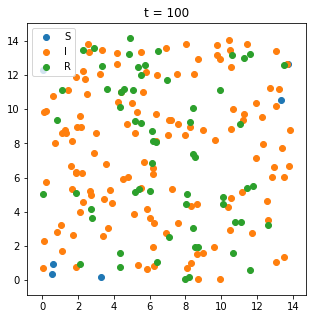

In [6]:
model.plot(t=100)

In [7]:
from ipywidgets import interact, IntSlider
interact(model.plot, t=IntSlider(min=0, max=500));

interactive(children=(IntSlider(value=0, description='t', max=500), Output()), _dom_classes=('widget-interact'…

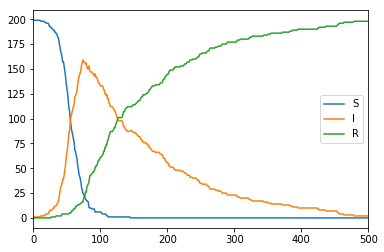

In [8]:
counts = model.get_counts()
counts.plot();

# Inference

In [9]:
from inference_model import InferenceModel

In [10]:
def generate_initial_probas(M, states):
    freqs = [np.mean(states==s) for s in [0,1,2]]
    print("freqs = ", freqs)
    N = len(states)
    initial_probas = np.broadcast_to(freqs, (N, 3)).copy()
    observations = np.random.choice(N, M, replace=False)
    for i in observations:
        s = int(states[i])
        initial_probas[i] = np.zeros(3)
        initial_probas[i, s] = 1.
    return initial_probas

# we observe M=20 persons at time t_obs=50
t_obs = 50
initial_probas = generate_initial_probas(M=20, states=model.states[t_obs])
infer = InferenceModel(initial_probas, model.x_pos, model.y_pos)

freqs =  [0.655, 0.325, 0.02]


In [12]:
infer.time_evolution(model.recover_probas, model.transmissions[t_obs:], print_every=100)

t = 0 / 450
t = 100 / 450
t = 200 / 450
t = 300 / 450
t = 400 / 450


In [14]:
interact(infer.plot_probas, t=IntSlider(min=0, max=500-t_obs));

interactive(children=(IntSlider(value=0, description='t', max=450), Output()), _dom_classes=('widget-interact'…

# Comparing number of S, I or R people 

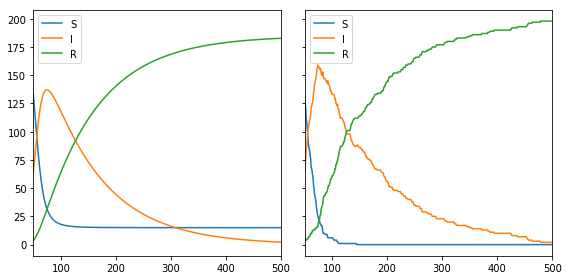

In [16]:
# compare number of cases
fig, axs = plt.subplots(1,2, figsize=(8,4),sharey=True)
counts_est = infer.get_counts()
counts_est.index += t_obs
counts_est.plot(ax=axs[0]);
counts[t_obs:].plot(ax=axs[1]);
fig.tight_layout()